Variables seleccionadas: ['radius_worst', 'perimeter_worst', 'area_se', 'area_mean', 'concavity_mean', 'concave_points_se', 'texture_mean', 'concavity_se', 'perimeter_mean', 'concavity_worst']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Modelo: Linear Regression
 - MSE: 2755.102
 - MAE: 33.681
 - R²: 0.992

Modelo: Ridge Regression
 - MSE: 2686.187
 - MAE: 28.481
 - R²: 0.992

Modelo: Lasso Regression
 - MSE: 2698.766
 - MAE: 32.829
 - R²: 0.992


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

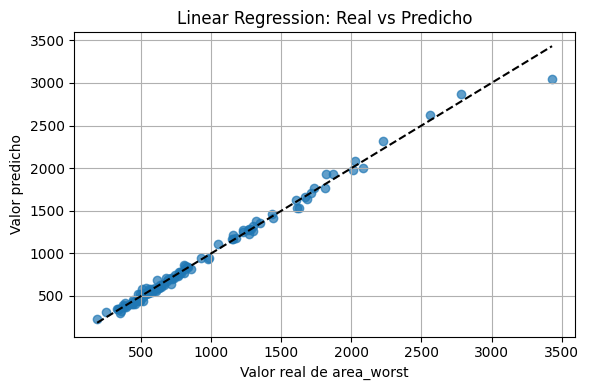

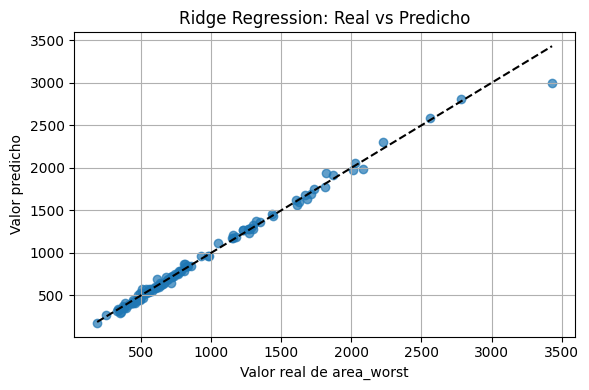

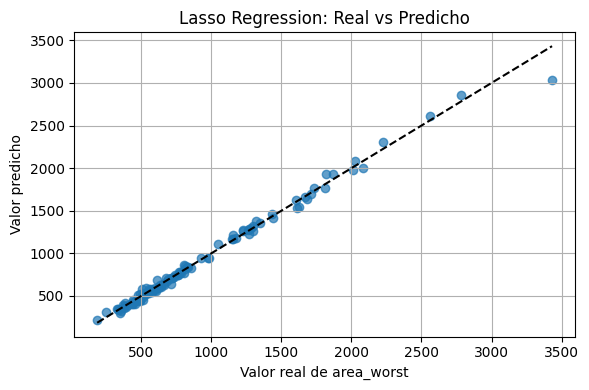


Importancia por perturbación - Linear Regression
perimeter_mean       740911.760601
area_mean            482700.225601
radius_worst         395246.625477
perimeter_worst       73088.984304
concavity_mean         2025.466983
concavity_worst         417.455438
concavity_se              2.431936
area_se                  -9.453839
concave_points_se       -26.095790
texture_mean            -35.784614
dtype: float64


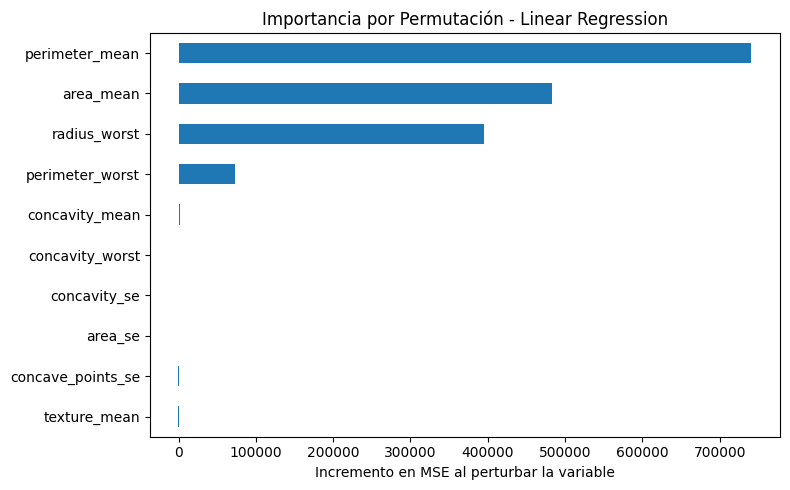


Importancia por perturbación - Ridge Regression
perimeter_mean       418228.177793
radius_worst         330295.033256
area_mean            274071.704086
perimeter_worst       77354.802835
concavity_mean          770.206388
area_se                 654.515483
concavity_worst         392.631823
concave_points_se       124.979286
concavity_se             10.886508
texture_mean            -59.796557
dtype: float64


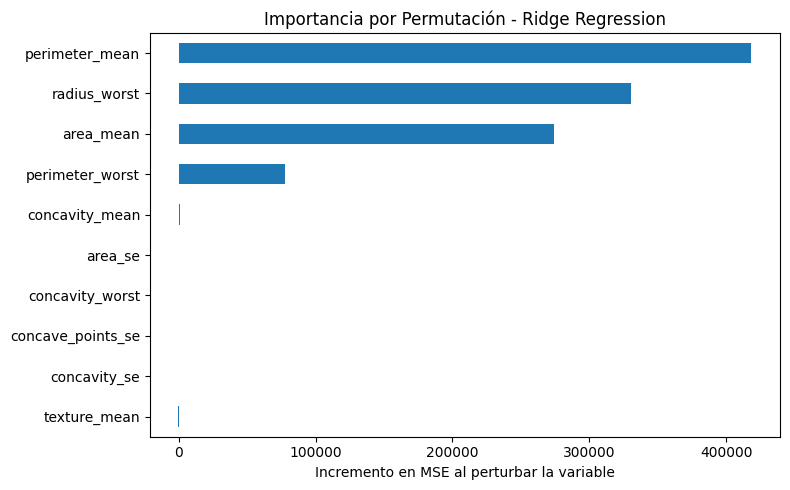


Importancia por perturbación - Lasso Regression
perimeter_mean       696421.735605
area_mean            455474.372436
radius_worst         403267.914425
perimeter_worst       66083.024931
concavity_mean         1711.633316
concavity_worst         336.207534
concavity_se              0.225863
area_se                  -3.645809
concave_points_se       -30.572347
texture_mean            -38.255064
dtype: float64


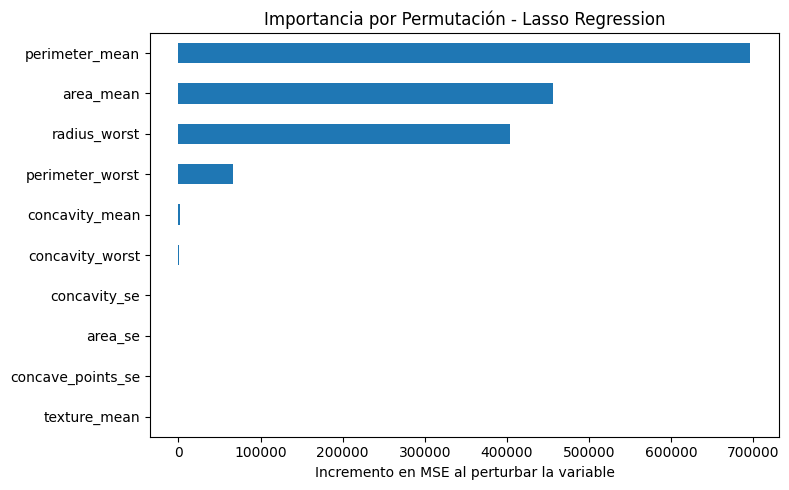

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from google.colab import files

# ----------------------------------------
# 1. CARGA Y PREPROCESAMIENTO
# ----------------------------------------

# Cargar la base de datos.
df = pd.read_csv("Breast_Cancer_Database.csv")

# Codificación de la variable categórica(diagnosis).
# Convierte la variable categórica en valores numéricos(0 y 1).
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

# Separar las variables predictoras(X) y la variable objetivo(area_worst).
columnas_a_eliminar = ['id', 'area_worst']
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
X = df.drop(columns=columnas_existentes)
y = df['area_worst']

# Selección de las variables más importantes para determinar 'area_worst' con RandomForestRegressor.
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)

importancias = pd.Series(forest.feature_importances_, index=X.columns)
variables_seleccionadas = importancias.sort_values(ascending=False).head(10).index.tolist() # Selecciona las 10 más importantes.
print("Variables seleccionadas:", variables_seleccionadas)   # Muestra las variables seleccionadas.

# Guardar y exporta las variables seleccionadas en un Excel.
variables_df = pd.DataFrame(variables_seleccionadas, columns=["Variable seleccionada"])
variables_df.to_excel("variables_seleccionadas_regresion.xlsx", index=False)
files.download("variables_seleccionadas_regresion.xlsx")

# Escalado(normalización) de las 10 variables más importantes.
# Media 0 y desviación estándar 1.
X = X[variables_seleccionadas]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar el conjunto de datos en entrenamiento y test.
# 80% entrenamiento y 20% test.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ----------------------------------------
# 2. ALGORITMOS DE REGRESIÓN
# ----------------------------------------

# Definición de los modelos de regresión.
modelos = {
    "Linear Regression": LinearRegression(),  # Sin regularización
    "Ridge Regression": Ridge(alpha=1.0),     # Con regularización L2
    "Lasso Regression": Lasso(alpha=0.1)      # Con regularización L1
}

# Creación de las estructuras para guardar los resultados.
resultados = []
predicciones = {}

# Bucle para realizar el entrenamiento, predicción y evaluación de cada modelo.
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)      # Entrenamiento del modelo
    y_pred = modelo.predict(X_test)   # Predicciones para el conjunto de test
    predicciones[nombre] = y_pred

    # Evalución de las métricas MSE, MAE y R².
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimir resultados por pantalla.
    print(f"\nModelo: {nombre}")
    print(f" - MSE: {mse:.3f}")
    print(f" - MAE: {mae:.3f}")
    print(f" - R²: {r2:.3f}")

    # Guardo los resultados en la estructura resultados anteriormente creada.
    resultados.append({
        "Modelo": nombre,
        "MSE": round(mse, 3),
        "MAE": round(mae, 3),
        "R2": round(r2, 3)
    })

# Guardar las métricas en un Excel.
resultados_df = pd.DataFrame(resultados)
resultados_df.to_excel("metricas_modelos_regresion.xlsx", index=False)
files.download("metricas_modelos_regresion.xlsx")

# ----------------------------------------
# 3. VISUALIZACIÓN DE LAS GRÁFICAS
# ----------------------------------------

# Gráfico de dispersión: Valor Real vs Valor predicho.
for nombre, y_pred in predicciones.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Valor real de area_worst")
    plt.ylabel("Valor predicho")
    plt.title(f"{nombre}: Real vs Predicho")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Creación de la estructura para guardar los resultados.
sensibilidad_total = []


# Bucle externo - Recorre para cada modelo.
for nombre, modelo in modelos.items():
    print(f"\nImportancia por perturbación - {nombre}")
    y_base = modelo.predict(X_test) # Generan las predicciones normales(sin alteraciones) sobre el conjunto de test
    mse_base = mean_squared_error(y_test, y_base) # Calcula el MSE original del modelo para ese conjunto

    # Creación de un diccionario vacío para guardar los cambios de error(MSE).
    importancia_permutacion = {}

    # Bucle interno - Recorre para cada variable seleccionada.
    for i, col in enumerate(variables_seleccionadas):

        # Perturbación de una variable(se desordena aleatoriamente).
        X_test_permutado = X_test.copy()
        X_test_permutado[:, i] = shuffle(X_test_permutado[:, i], random_state=42)

        # Predicción con la variable perturbada.
        y_permutado = modelo.predict(X_test_permutado)
        mse_permutado = mean_squared_error(y_test, y_permutado)

        # Medir el impacto de la variable.
        # Un incremento en el MSE alto, la variable es muy importante.
        delta = mse_permutado - mse_base  # MSE de la variable perturbada menos el MSE base del modelo
        importancia_permutacion[col] = delta

        # Guarda las métricas en la lista anteriormente creada.
        sensibilidad_total.append({
            "Modelo": nombre,
            "Variable": col,
            "MSE original": round(mse_base, 5),
            "MSE permutado": round(mse_permutado, 5),
            "Delta MSE": round(delta, 5)
        })

    # Ordena e imprime los resultados.
    importancia_ordenada = pd.Series(importancia_permutacion).sort_values(ascending=False)
    print(importancia_ordenada)

    # Gráficar los resultados del modelo.
    plt.figure(figsize=(8, 5))
    importancia_ordenada.plot(kind='barh')
    plt.xlabel("Incremento en MSE al perturbar la variable")
    plt.title(f"Importancia por Permutación - {nombre}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Guarda los resultados del análisis de sensibilidad por permutación en un Excel.
sensibilidad_df = pd.DataFrame(sensibilidad_total)
sensibilidad_df.to_excel("importancia_permutacion_metricas.xlsx", index=False)
files.download("importancia_permutacion_metricas.xlsx")